# Importing Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os
from Modules.utils import year_air_pollution_plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing

## Initiating Configurations

In [11]:
DATA_SETS_FOLDER = "./Datasets/"
OUTPUTS_FOLDER = "./Outputs/"

## Loading Datasets

In [39]:
all_data_sets = []
for file in os.listdir(DATA_SETS_FOLDER):
    data = pd.read_excel(DATA_SETS_FOLDER + file)
    
    # just want Date and AQI 
    cleaned_data = data.iloc[:, [1, -7]].to_numpy()[2:-2] #-2 is because last data is NAN
    all_data_sets.append(cleaned_data)

## Joining Datasets

In [40]:
dataset = np.vstack(all_data_sets)

In [41]:
df = pd.DataFrame(dataset)

In [42]:
df.columns = ["Date", "AQI"]

## Visualization

### All in one

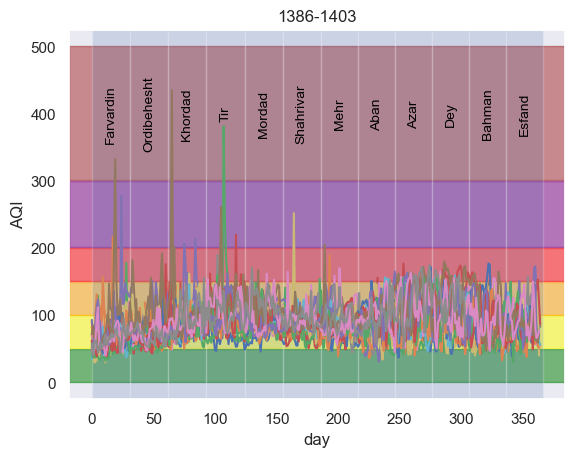

In [43]:
first_plot = True
for dataset in all_data_sets:
    year_air_pollution_plot(dataset, helpers=first_plot, title="1386-1403")
    
    # we want helpers draw just on first plot
    first_plot = False
    
plt.savefig(OUTPUTS_FOLDER + "Yearly-Plots/1386-1403.png")

### Yearly plots

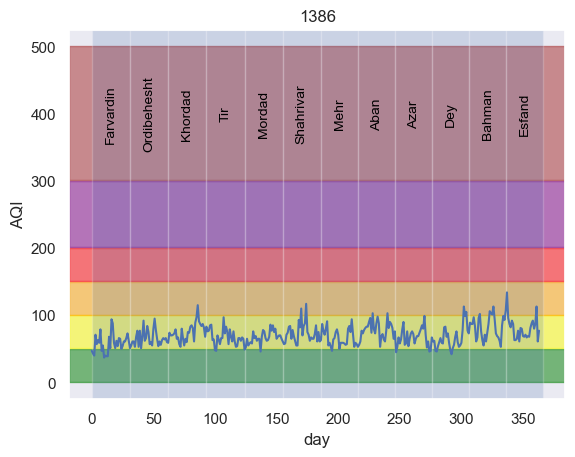

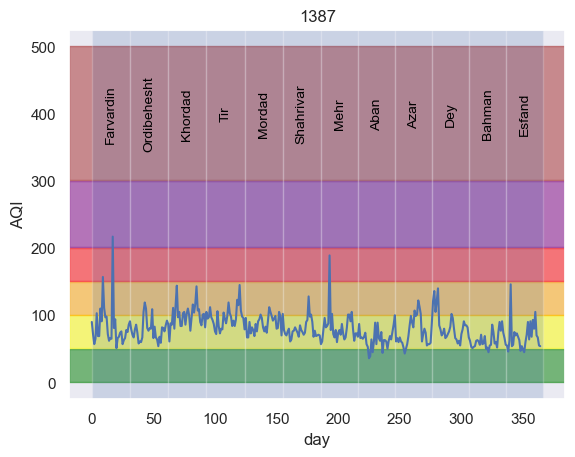

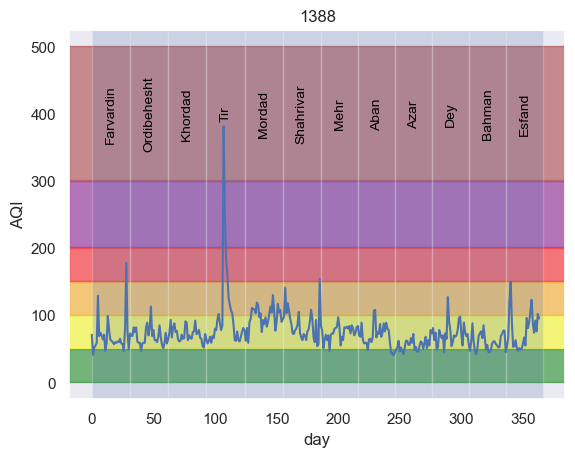

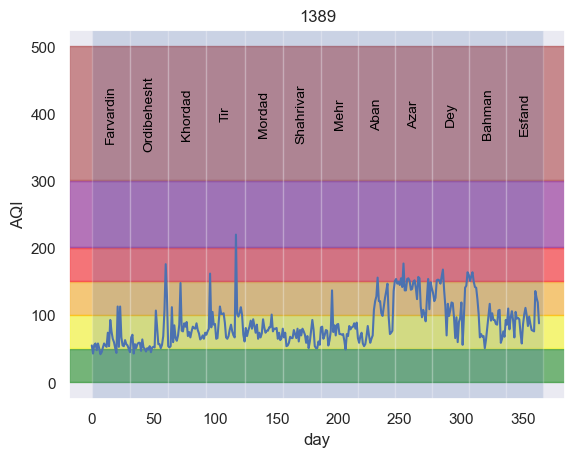

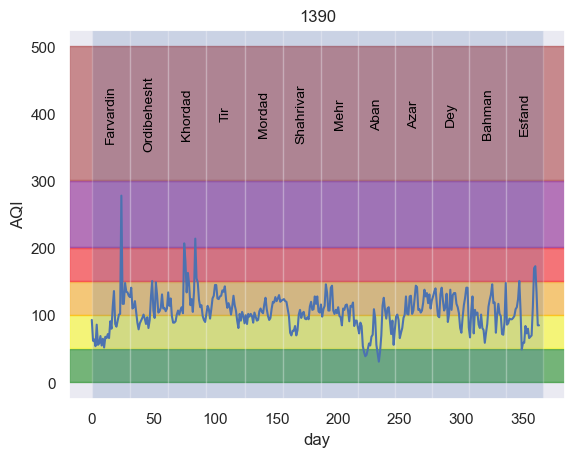

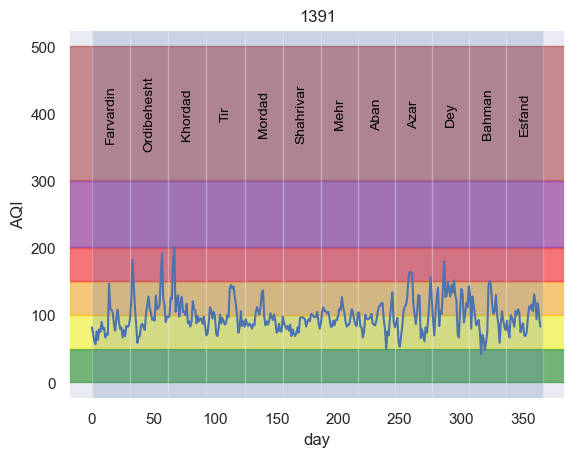

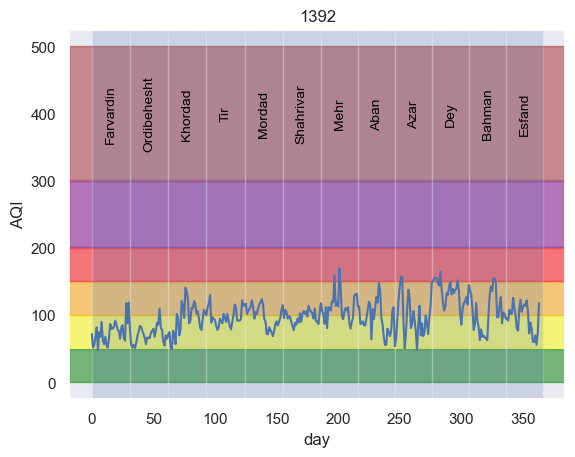

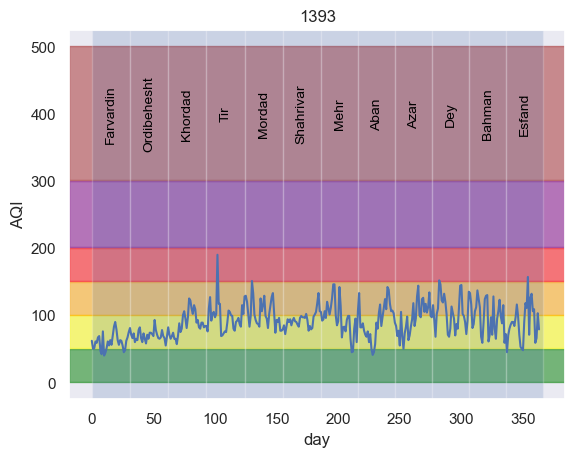

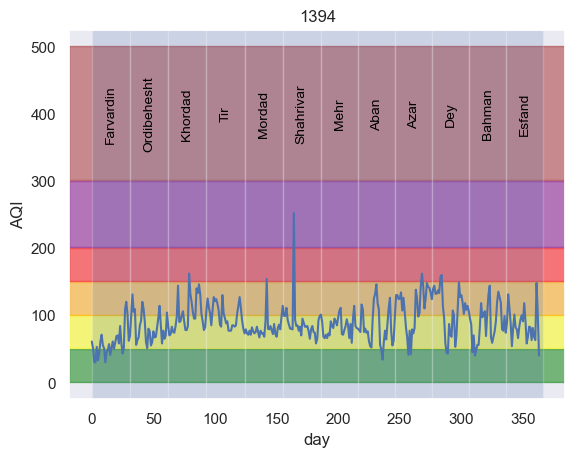

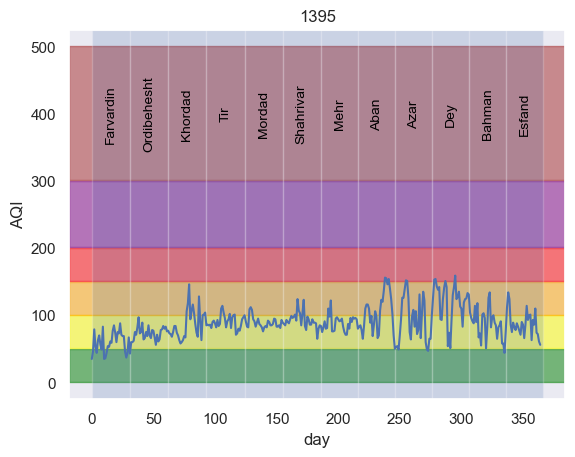

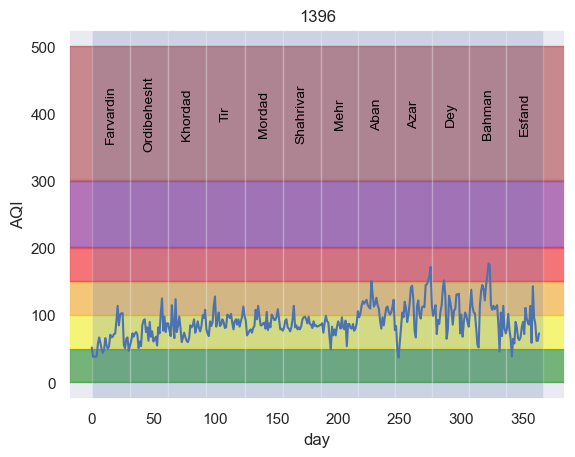

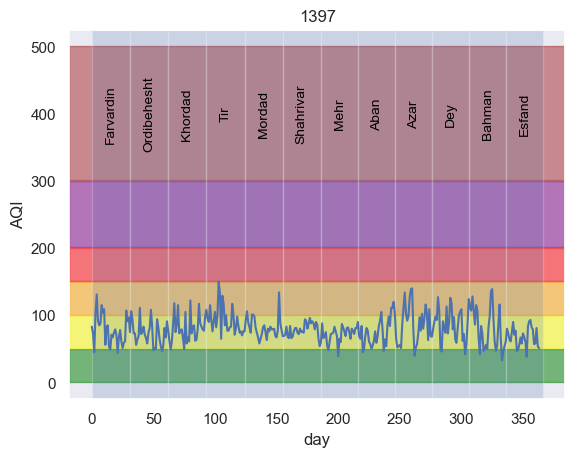

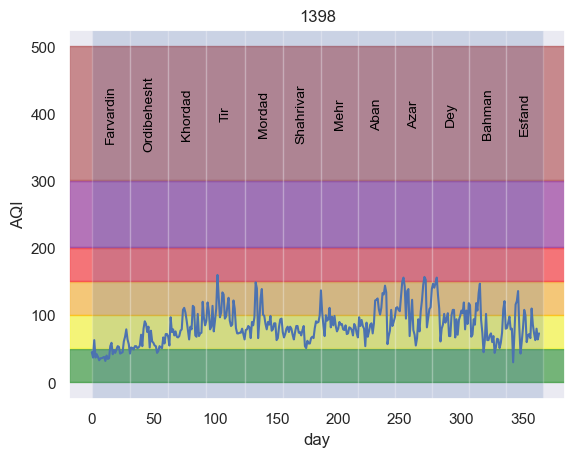

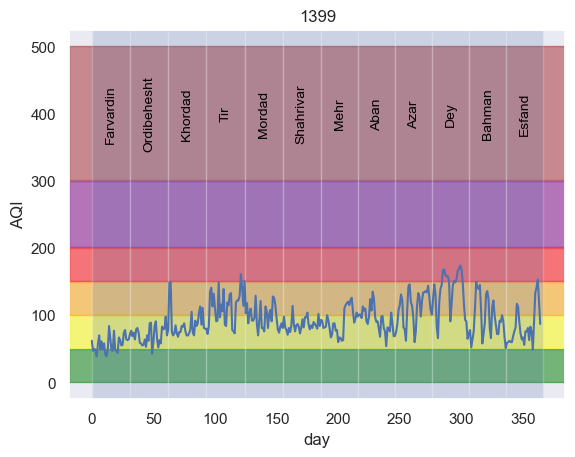

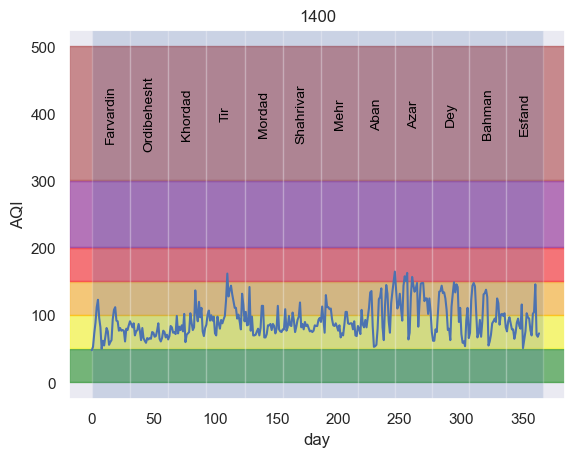

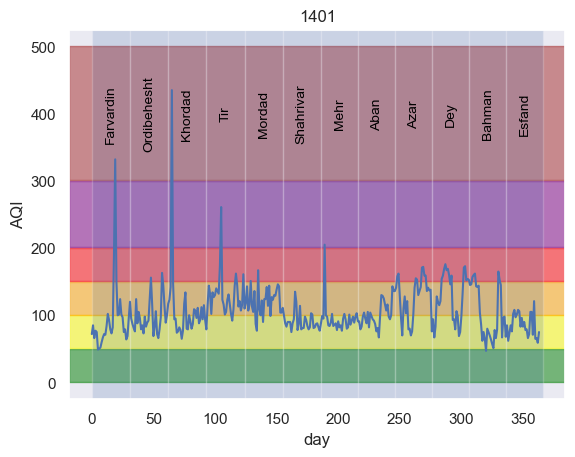

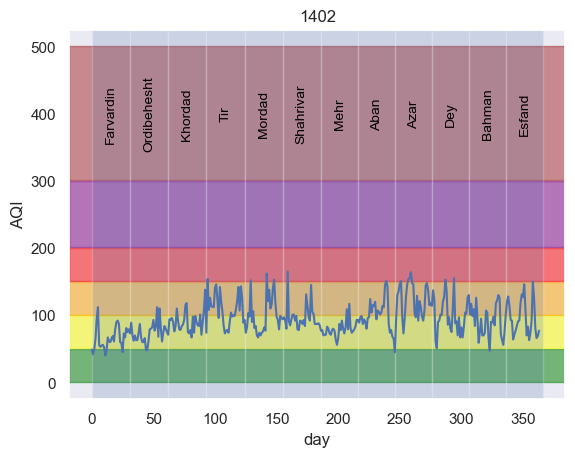

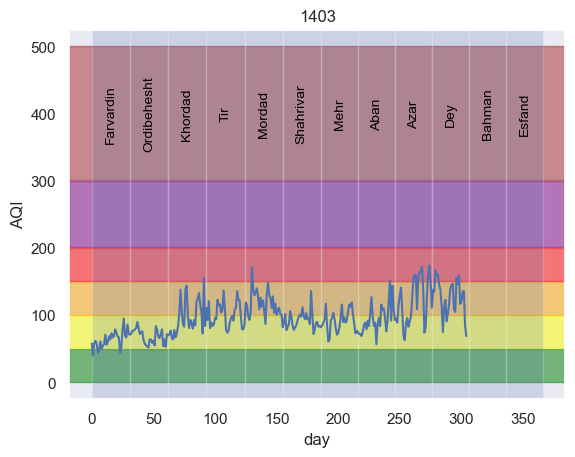

In [44]:
for dataset in all_data_sets:
    # use plt.figure() to plot in new figure
    plt.figure()
    
    year_air_pollution_plot(dataset)
    
    year = dataset[0][0][0:4]
    plt.savefig(OUTPUTS_FOLDER + f"Yearly-Plots/{year}")

## Fitting Linear Regression

In [45]:
models = []
for dataset in all_data_sets:
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the training data
    model.fit(np.arange(dataset[:, 1].size).reshape(-1, 1), dataset[:, 1])
    
    models.append(model)

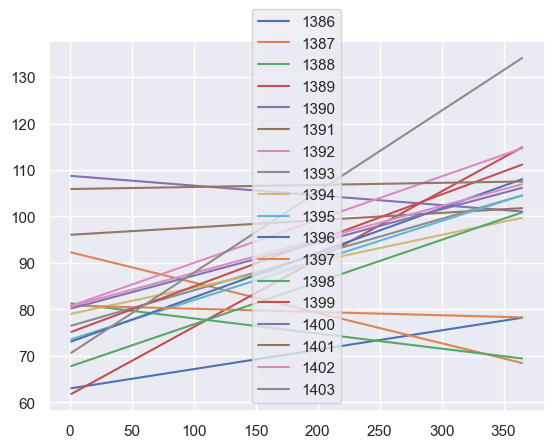

In [52]:
for i, model in enumerate(models):
    plt.plot([1, 365], model.predict([[1], [365]]), label=1386+i)
    
plt.legend();

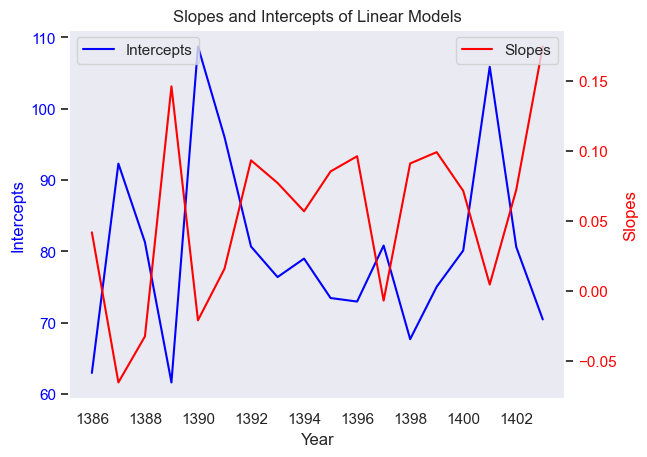

In [94]:
# Assuming 'models' is a list of trained linear models
years = np.arange(1386, 1404)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the intercepts on the left y-axis
ax1.plot(years, [model.intercept_ for model in models], label="Intercepts", color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Intercepts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the slopes
ax2 = ax1.twinx()
ax2.plot(years, [model.coef_[0] for model in models], label="Slopes", color='red')
ax2.set_ylabel('Slopes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks to be integers
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Title and legend
plt.title('Slopes and Intercepts of Linear Models')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

sns.set_style("dark");